# PML Test (Hugonin 2005)

This test illustrates the usage of the complex coordinate transform. This is useful when dealing with structure in which a high portion of the power is scattered away. 

This test is based on the paper "Perfectly matched layers as nonlinear coordinate
transforms: a generalized formalization" by Jean Paul Hugonin and Philippe Lalanne (J. Opt. Soc. Am. A / Vol. 22, No. 9 / September 2005).

## Summary
The example will compute the reflection and transmission from 2 dent in a 1D waveguide. 

The following example will:
 1. Import all necessary modules
 2. Define the layers involved
 3. Combine them into a structure
 4. Calculate transmission and reflection
 5. Sweep over truncation order
 
 
### Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import A_FMM

### Define layers involved

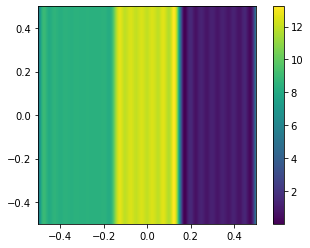

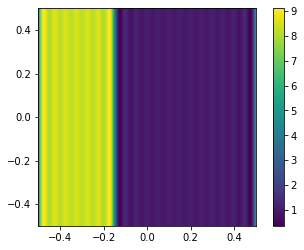

In [2]:
ax = 1.0
lam = 0.975
k0 = ax/lam

s = 0.3
d = 0.15

n_core = 3.5
n_clad = 2.9
n_air = 1.0

Nx = 20
Ny = 0

cr = A_FMM.Creator()
cr.slab(n_core**2.0, n_clad**2.0, n_air**2.0, s/ax)
wave = A_FMM.Layer(Nx,0,cr)
cr.slab(n_air**2.0, n_clad**2.0, n_air**2.0, s/ax)
gap=A_FMM.Layer(Nx,0,cr)   

wave.eps_plot()
gap.eps_plot()



### Define stack structure

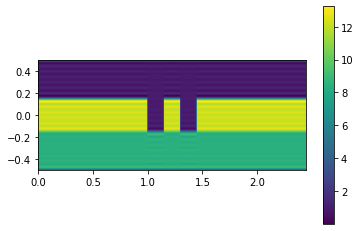

In [3]:
mat = [wave, gap, wave, gap, wave]
dl = [x/ax for x in [1.0,d,d,d,1.0]]
st = A_FMM.Stack(mat, dl)
st.count_interface()
st.transform_complex(0.7)

st.plot_stack()

### Solve structure and calculate reflection


In [4]:
st.solve(ax/lam)
print('TE Reflection:{}'.format(st.get_R(0,0)))
print('TM Reflection:{}'.format(st.get_R(1,1)))

TE Reflection:0.393090721299691
TM Reflection:0.35518242193230815


## Field Plotting
### Plotting field under TE illumination

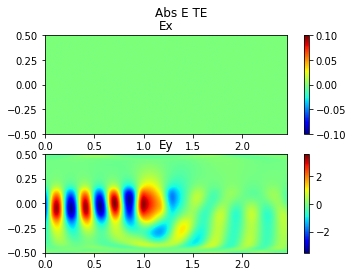

In [5]:
st.plot_E(i=0,title='Abs E TE')

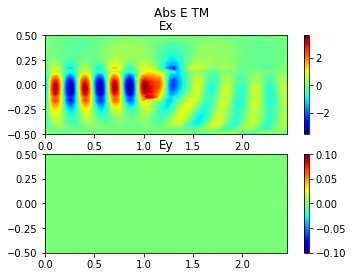

In [6]:
st.plot_E(i=1,title='Abs E TM')

## Sweep over truncation order

In [7]:
def calc(Nx):
    cr.slab(n_core**2.0, n_clad**2.0, n_air**2.0, s/ax)
    wave = A_FMM.Layer(Nx,0,cr)
    cr.slab(n_air**2.0, n_clad**2.0, n_air**2.0, s/ax)
    gap=A_FMM.Layer(Nx,0,cr)   
    mat = [wave, gap, wave, gap, wave]
    dl = [x/ax for x in [1.0,d,d,d,1.0]]
    st = A_FMM.Stack(mat, dl)
    st.count_interface()
    st.transform_complex(0.7)
    st.solve(ax/lam)
    return st.get_R(0,0), st.get_R(1,1)

In [8]:
NX = [10,20,30,40,50,60,70,80,100]
RR = [calc(Nx) for Nx in NX]
Data = pd.DataFrame(RR, index=NX, columns=['TE', 'TM'])

Text(0, 0.5, '$|R-R_0|$')

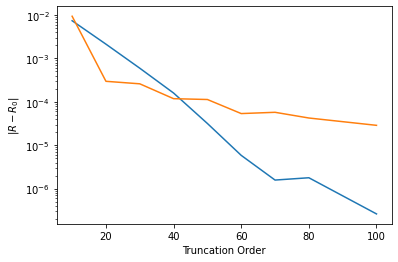

In [9]:
plt.plot(NX, abs(Data['TE']-0.3952113445))
plt.plot(NX, abs(Data['TM']-0.3554787))
plt.yscale('log')
plt.xlabel('Truncation Order')
plt.ylabel(r'$|R-R_0|$')